# Лабораторная работа №2
## Решение краевых задач. Методы коллокаций, наименьших квадратов и Галеркина
### Вариант 19
*Задание.* Методами коллакаций, интегральным и дискретным методами наименьших квадратов и Галеркина получить численное решение краевой задачи.

- $y''+(1+x^2)y=-1,   -1\le x\le 1,    y(-1)=y(1)=0$

- $ay''+(1+bx^2)y=-1,    -1\le x\le 1,   y(-1)=y(1)=0, a=sin(19), b=cos(19)$

Базисную систему выбрать в виде:

$\phi_0=0$,

$\phi_i(x)=x^i(1-x), i=1,2,...$

In [7]:
# importing necessary libraries

import numpy as np
import scipy as sp
from scipy.misc import derivative 
from scipy import sparse
import matplotlib.pyplot as plt

In [222]:
# variant number and initial conditions

K = 19
a = -1
b = 1
n = 600

In [252]:
def basic_func(x, i, deriv=0):
    if deriv == 0:
        return x**i * (1 - x * x)
    elif deriv == 1:
        return x**(i - 1) * (i - x * (i + 1))
    elif deriv == 2:
        #if i == 1:
        #    return -2
        #return i * x ** (i - 2) * (i * (1 - x) - (1 + x))
        return x**(i-2) * (i * i - i) - x**i * (i+1)*(i+2)
        #return derivative(lambda x: (x**(2*i - 2)) * (1. - x * x), x0=x, dx=1e-10, n=deriv)  

basic_func(-0.5, 3)
basic_func(-1, 1, 2)

6.0

In [253]:
# returns list of values in basic functions in 'x'

def linear_comb(x, n, deriv=0):
    res = []
    for i in range(1, n + 1):
        res.append(basic_func(x, i, deriv))
        
    return res

In [254]:
def f(x):
    return - 1.

In [255]:
def q(x):
    return (1. + x * x)

In [256]:
def psi(x, n):
    res = np.array(linear_comb(x, n, 2))
    res += np.array(linear_comb(x, n, 0)) * q(x)
    return res

In [257]:
psi(0.5, 2)

array([-2.53125 , -0.765625])

In [258]:
X = np.linspace(a, b, n+2 )
X = X[1:-1:]


In [259]:
M = np.matrix([psi(i, n) for i in X])
M

matrix([[  5.9668325 ,  -9.90710916,  13.80785015, ...,  -0.81654395,
           0.27068209,   0.2733663 ],
        [  5.93388429,  -9.81478977,  13.61741599, ...,  44.36300703,
         -44.28900439,  44.2145109 ],
        [  5.90115316,  -9.72303749,  13.42868574, ...,  12.00266271,
         -11.93250882,  11.86265788],
        ...,
        [ -5.90115316,  -9.72303749, -13.42868574, ...,  12.00266271,
          11.93250882,  11.86265788],
        [ -5.93388429,  -9.81478977, -13.61741599, ...,  44.36300703,
          44.28900439,  44.2145109 ],
        [ -5.9668325 ,  -9.90710916, -13.80785015, ...,  -0.81654395,
          -0.27068209,   0.2733663 ]])

In [260]:
A = np.linalg.solve(M, np.array([-1] * (n)))

In [261]:
A

array([ 2.23530401e-01, -4.99989244e-01,  1.86299838e-01, -4.58336592e-01,
        1.74888963e-01, -4.46885896e-01,  2.94479775e-01, -3.30765482e-01,
       -3.49649814e+00, -1.42948839e+00,  7.29889309e+01, -1.61681545e+01,
       -9.92547510e+02,  5.39169908e+02,  9.85951075e+03, -7.39038603e+03,
       -7.40041888e+04,  6.31654857e+04,  4.29850247e+05, -3.73830788e+05,
       -1.95805802e+06,  1.58814611e+06,  7.02430549e+06, -4.85325410e+06,
       -1.97376378e+07,  1.02752704e+07,  4.26608419e+07, -1.30310370e+07,
       -6.80958671e+07,  2.35057117e+06,  7.27246951e+07,  2.64176533e+07,
       -3.54209376e+07, -5.33178021e+07, -2.51682140e+07,  4.51286433e+07,
        5.18123849e+07, -5.01242414e+06, -2.62589295e+07, -1.57562909e+07,
        1.49565187e+07, -7.42752523e+06, -5.97365202e+07,  2.45482566e+07,
        8.08444664e+07,  1.16193347e+07, -2.37576698e+07, -6.55809763e+07,
       -2.22279775e+07,  6.59751267e+07,  2.73898429e+07, -9.70700266e+06,
       -7.16239520e+07, -

In [264]:
solution = []
for jj in range(n):
    s = 0
    for kk, ii in enumerate(A):
        s += ii * basic_func(X[jj], kk + 1)
    solution.append(s)
solution

[-0.62265435885638,
 -0.6168195997015573,
 -0.6141414833055023,
 -0.6113835322762498,
 -0.6086268251748379,
 -0.605867685947274,
 -0.6031064925425369,
 -0.600343319582253,
 -0.5975782735141596,
 -0.594811456797118,
 -0.5920429726065913,
 -0.5892729209128237,
 -0.5865014019060686,
 -0.5837285177653831,
 -0.580954367875753,
 -0.5781790510358901,
 -0.5754026665540131,
 -0.5726253132780519,
 -0.5698470884146377,
 -0.5670680898549005,
 -0.5642884139533151,
 -0.5615081564689053,
 -0.5587274145172307,
 -0.5559462833032983,
 -0.5531648568489991,
 -0.5503832301302942,
 -0.5476014963932477,
 -0.5448197488464218,
 -0.5420380808521256,
 -0.5392565846110516,
 -0.5364753513770325,
 -0.5336944729924138,
 -0.5309140398353568,
 -0.5281341422807123,
 -0.5253548700271269,
 -0.5225763122400888,
 -0.5197985578608324,
 -0.5170216949398786,
 -0.5142458114227791,
 -0.5114709943399851,
 -0.5086973305905047,
 -0.505924906360945,
 -0.503153807464142,
 -0.5003841191594862,
 -0.4976159262742322,
 -0.49484931288995

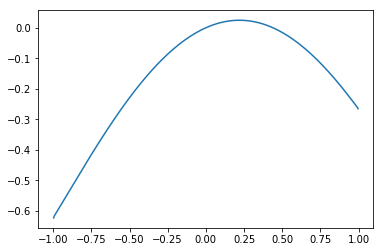

In [266]:
plt.plot(X, solution)

In [267]:
def ans_f(x):
    res = 0.0
    for i in range(1, n+1):
        res += A[i-1] * basic_func(x, i, 0)
    return res

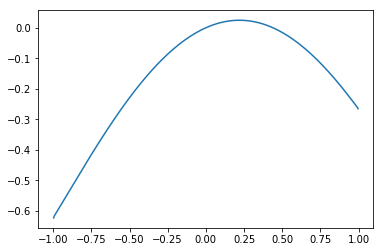

In [268]:
plt.plot(X, ans_f(X))

In [499]:
n=100
X=np.linspace(a,b,n)

def psi2(x, i):
    if x == 0 and i == 1:
        return -1
    return ((2*i-2) * (2*i-3) * (x**(2*i-4))) - ((2*i) * (2*i-1) * (x**(2*i - 2))) + ((x ** (2*i-2)) * (1-x*x) * (1+x*x))

X

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [500]:
matrix = []
for ind in range(1, n+1):
    tmp = []
    for j in range(1, n+1):
        tmp.append(psi2(X[ind-1], j))
    matrix.append(tmp)
    
matrix

[[-2.0,
  -10.0,
  -18.0,
  -26.0,
  -34.0,
  -42.0,
  -50.0,
  -58.0,
  -66.0,
  -74.0,
  -82.0,
  -90.0,
  -98.0,
  -106.0,
  -114.0,
  -122.0,
  -130.0,
  -138.0,
  -146.0,
  -154.0,
  -162.0,
  -170.0,
  -178.0,
  -186.0,
  -194.0,
  -202.0,
  -210.0,
  -218.0,
  -226.0,
  -234.0,
  -242.0,
  -250.0,
  -258.0,
  -266.0,
  -274.0,
  -282.0,
  -290.0,
  -298.0,
  -306.0,
  -314.0,
  -322.0,
  -330.0,
  -338.0,
  -346.0,
  -354.0,
  -362.0,
  -370.0,
  -378.0,
  -386.0,
  -394.0,
  -402.0,
  -410.0,
  -418.0,
  -426.0,
  -434.0,
  -442.0,
  -450.0,
  -458.0,
  -466.0,
  -474.0,
  -482.0,
  -490.0,
  -498.0,
  -506.0,
  -514.0,
  -522.0,
  -530.0,
  -538.0,
  -546.0,
  -554.0,
  -562.0,
  -570.0,
  -578.0,
  -586.0,
  -594.0,
  -602.0,
  -610.0,
  -618.0,
  -626.0,
  -634.0,
  -642.0,
  -650.0,
  -658.0,
  -666.0,
  -674.0,
  -682.0,
  -690.0,
  -698.0,
  -706.0,
  -714.0,
  -722.0,
  -730.0,
  -738.0,
  -746.0,
  -754.0,
  -762.0,
  -770.0,
  -778.0,
  -786.0,
  -794.0],
 [-1.92160783

In [501]:
matrix=[x for i,x in enumerate(matrix) if i == matrix.index(x)]
print(matrix)
print(len(matrix), len(matrix[0]))
dim = min(len(matrix), len(matrix[0]))
unique_m = []
for i in range(dim):
    tmp = []
    for j in range(dim):
        tmp.append(matrix[i][j])
    unique_m.append(tmp)
A = np.linalg.solve(unique_m, np.array([-1] * (len(matrix))))
A

[[-2.0, -10.0, -18.0, -26.0, -34.0, -42.0, -50.0, -58.0, -66.0, -74.0, -82.0, -90.0, -98.0, -106.0, -114.0, -122.0, -130.0, -138.0, -146.0, -154.0, -162.0, -170.0, -178.0, -186.0, -194.0, -202.0, -210.0, -218.0, -226.0, -234.0, -242.0, -250.0, -258.0, -266.0, -274.0, -282.0, -290.0, -298.0, -306.0, -314.0, -322.0, -330.0, -338.0, -346.0, -354.0, -362.0, -370.0, -378.0, -386.0, -394.0, -402.0, -410.0, -418.0, -426.0, -434.0, -442.0, -450.0, -458.0, -466.0, -474.0, -482.0, -490.0, -498.0, -506.0, -514.0, -522.0, -530.0, -538.0, -546.0, -554.0, -562.0, -570.0, -578.0, -586.0, -594.0, -602.0, -610.0, -618.0, -626.0, -634.0, -642.0, -650.0, -658.0, -666.0, -674.0, -682.0, -690.0, -698.0, -706.0, -714.0, -722.0, -730.0, -738.0, -746.0, -754.0, -762.0, -770.0, -778.0, -786.0, -794.0], [-1.921607835951765, -9.444792177172754, -16.05593927129445, -21.828255559728092, -26.830059156293174, -31.125073419979138, -34.772704077976364, -37.828300776638336, -40.34340389288756, -42.36597739568709, -43.9

array([ 9.32647259e-01, -3.36763704e-02, -3.08700062e-02,  1.24723546e-03,
        6.23618290e-04,  2.73219782e-04,  2.89335176e-04,  1.68513493e-04,
        1.49363861e-03, -9.66998887e-03,  6.41863275e-02, -3.19476982e-01,
        1.23509463e+00, -3.60905179e+00,  7.70426325e+00, -1.11651897e+01,
        9.07568479e+00, -9.55267993e-01, -2.96933915e+00, -4.98242355e+00,
        1.21435839e+01, -7.70201846e+00,  7.58115720e+00, -9.14831662e+00,
       -2.00349215e+01,  5.33448109e+01, -3.76292350e+01,  7.57553339e+00,
        3.06688303e+00, -1.25714895e+01, -2.68607278e+00,  2.80682574e+01,
       -1.34987573e+01, -7.43632298e+00,  1.05930052e+01,  2.75353332e+00,
       -1.55536913e+01,  4.00009650e+00, -1.69247380e+01,  2.01203825e+01,
        2.19763999e+00,  1.07005090e+01,  6.13311365e+00, -1.65670300e+01,
       -1.49027182e+00, -1.39603021e+01, -1.82961758e+00,  7.93095570e+00,
        6.50877734e+00,  3.49695001e+00, -9.01721264e-01,  3.43286113e-01,
       -5.24823162e+00,  

In [502]:
solution = []
X = np.linspace(a, b, 100)
for jj in X:
    s = 0
    for kk, ii in enumerate(A):
        s += ii * jj ** (2 * kk)
    s *= (1 - jj * jj)
    solution.append(s)
    
print(X)
solution

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

[0.0,
 0.03516984507196207,
 0.06961447414803518,
 0.10359972476846141,
 0.13709730878670912,
 0.17008365837378975,
 0.2025364804922862,
 0.23443479169184203,
 0.26575887453249,
 0.29649023572389627,
 0.326611563323987,
 0.35610668331923845,
 0.3849605157430425,
 0.4131590304910196,
 0.44068920298231556,
 0.4675389698075144,
 0.4936971844954307,
 0.5191535735229462,
 0.5438986926841886,
 0.5679238839277554,
 0.5912212327633563,
 0.6137835263321968,
 0.6356042122286758,
 0.6566773581544961,
 0.6769976124801338,
 0.6965601657827408,
 0.7153607134239849,
 0.733395419226074,
 0.7506608802992348,
 0.7671540930692392,
 0.7828724205491759,
 0.7978135608955669,
 0.8119755172850718,
 0.8253565691444756,
 0.8379552447633262,
 0.8497702953155272,
 0.8608006703133714,
 0.8710454945148929,
 0.8805040463030357,
 0.8891757375529581,
 0.897060095001801,
 0.9041567431334526,
 0.9104653885891856,
 0.9159858061135717,
 0.9207178260437257,
 0.9246613233487144,
 0.9278162082248667,
 0.9301824182517049,
 0.

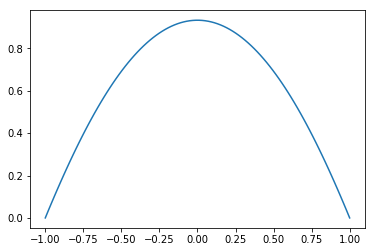

In [503]:

plt.plot(X,solution)